In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os


from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import img_to_array,array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
folder_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
class_name = os.listdir(folder_path)
class_name.sort()
class_name = class_name[0:4]+class_name[20:23]
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

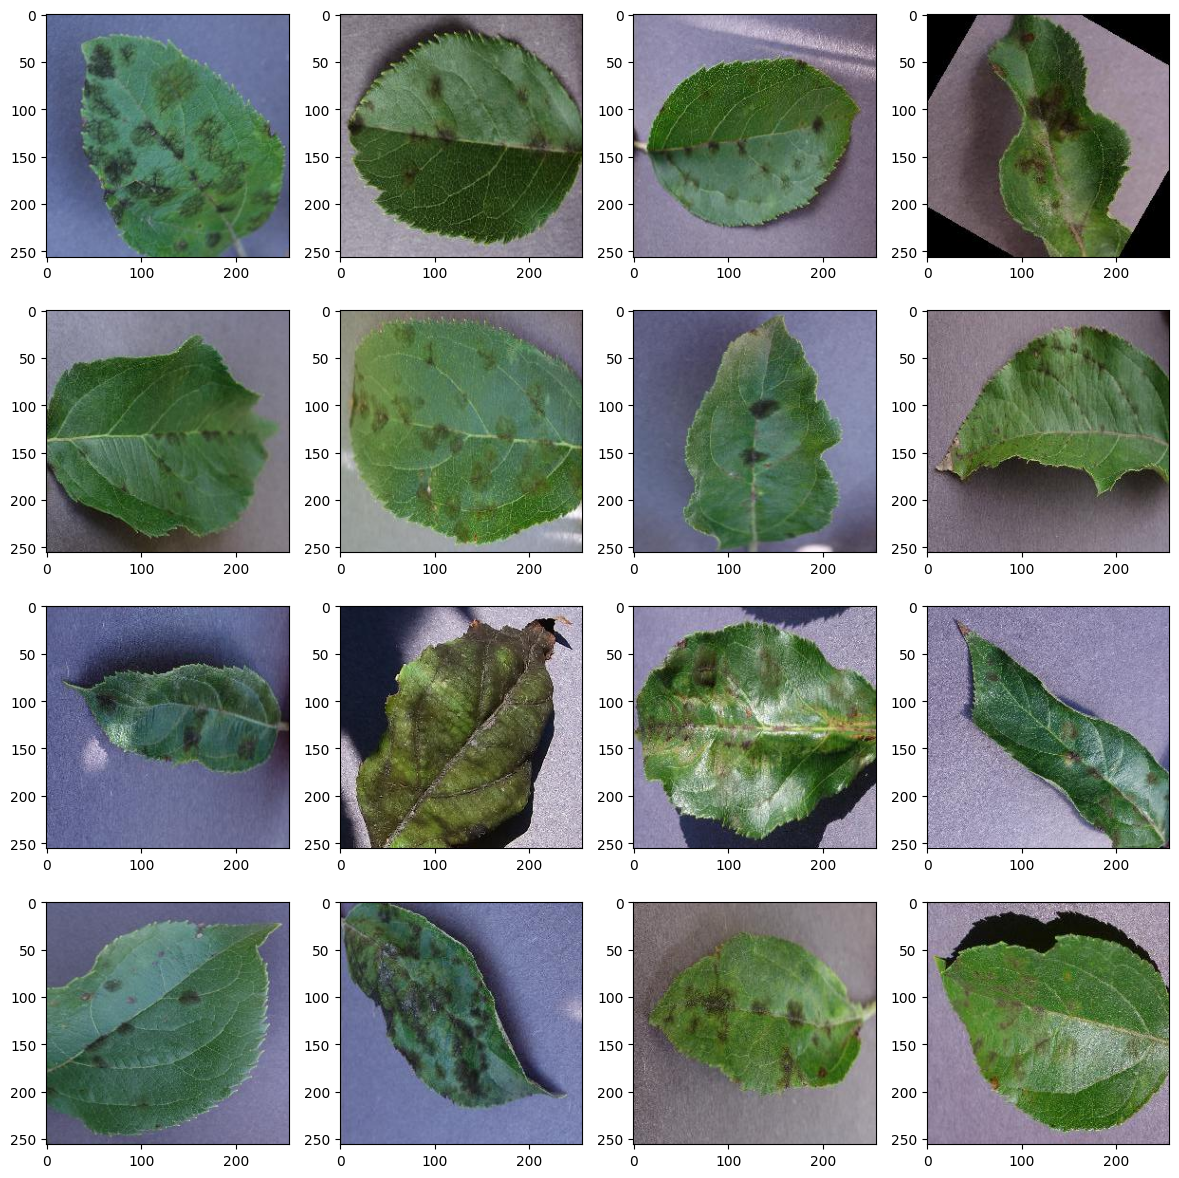

In [4]:
plt.figure(figsize=(12,12))
path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)

In [5]:
def convert_to_array(images):
    try:
        image = cv2.imread(images)
        if image is not None :
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
image_data = []
label_data = []


label_class_names = class_name
label_no = 0

for folder in class_name:
    images = os.listdir(folder_path + "/" + folder)
    print("Folder -- {} " .format(folder), "The label for folder ==> ",label_no, " No of images in Folder ===> ",len(images))
    images = images[0:400]
    for img in images:
        image = f"{folder_path}/{folder}/{img}"
        image_data.append(convert_to_array(image))
        label_data.append(label_no)
    label_no += 1

Folder -- Apple___Apple_scab  The label for folder ==>  0  No of images in Folder ===>  2016
Folder -- Apple___Black_rot  The label for folder ==>  1  No of images in Folder ===>  1987
Folder -- Apple___Cedar_apple_rust  The label for folder ==>  2  No of images in Folder ===>  1760
Folder -- Apple___healthy  The label for folder ==>  3  No of images in Folder ===>  2008
Folder -- Potato___Early_blight  The label for folder ==>  4  No of images in Folder ===>  1939
Folder -- Potato___Late_blight  The label for folder ==>  5  No of images in Folder ===>  1939
Folder -- Potato___healthy  The label for folder ==>  6  No of images in Folder ===>  1824


In [7]:
print(len(image_data))
len(label_data)

2800


2800

In [8]:
image_data = np.array(image_data, dtype=np.float32) / 255.0

In [9]:
label_counts = pd.DataFrame(label_data).value_counts()
print(label_counts)

0    400
1    400
2    400
3    400
4    400
5    400
6    400
Name: count, dtype: int64


In [10]:
label_data = np.array(label_data)
label_data = to_categorical(label_data)

In [11]:
label_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [12]:
model = Sequential()
#model.add(Dense(8, activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(7, activation="softmax"))

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [15]:
val_folder_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [16]:
val_image_data = []
val_label_data = []


label_no = 0

for folder in class_name:
    images = os.listdir(val_folder_path + "/" + folder)
    print("Folder -- {} " .format(folder), "The label for folder ==> ",label_no, " No of images in Folder ===> ",len(images))
    images = images[0:200]
    for img in images:
        image = f"{val_folder_path}/{folder}/{img}"
        val_image_data.append(convert_to_array(image))
        val_label_data.append(label_no)
    label_no += 1

Folder -- Apple___Apple_scab  The label for folder ==>  0  No of images in Folder ===>  504
Folder -- Apple___Black_rot  The label for folder ==>  1  No of images in Folder ===>  497
Folder -- Apple___Cedar_apple_rust  The label for folder ==>  2  No of images in Folder ===>  440
Folder -- Apple___healthy  The label for folder ==>  3  No of images in Folder ===>  502
Folder -- Potato___Early_blight  The label for folder ==>  4  No of images in Folder ===>  485
Folder -- Potato___Late_blight  The label for folder ==>  5  No of images in Folder ===>  485
Folder -- Potato___healthy  The label for folder ==>  6  No of images in Folder ===>  456


In [17]:
val_image_data = np.array(val_image_data, dtype=np.float32) / 255.0

In [18]:
val_label_counts = pd.DataFrame(val_label_data).value_counts()
val_label_counts

0    200
1    200
2    200
3    200
4    200
5    200
6    200
Name: count, dtype: int64

In [19]:
val_label_data = np.array(val_label_data)
val_label_data = to_categorical(val_label_data)

In [20]:
val_label_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [21]:
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [22]:
callback = EarlyStopping(monitor='val_accuracy', patience=10)

In [23]:
val_image_data.shape, val_label_data.shape

((1400, 256, 256, 3), (1400, 7))

In [24]:
history = model.fit(image_data, label_data, batch_size = 128, epochs = 100, validation_data = (val_image_data, val_label_data),verbose = 1, callbacks = [callback])

Epoch 1/100
22/22 [==============================] - 25s 409ms/step - loss: 1.7921 - accuracy: 0.3379 - val_loss: 1.5733 - val_accuracy: 0.4943
Epoch 2/100
22/22 [==============================] - 4s 181ms/step - loss: 1.3602 - accuracy: 0.5725 - val_loss: 1.2124 - val_accuracy: 0.5864
Epoch 3/100
22/22 [==============================] - 4s 172ms/step - loss: 1.0413 - accuracy: 0.6818 - val_loss: 1.0108 - val_accuracy: 0.6757
Epoch 4/100
22/22 [==============================] - 4s 174ms/step - loss: 0.8696 - accuracy: 0.7282 - val_loss: 0.8789 - val_accuracy: 0.7100
Epoch 5/100
22/22 [==============================] - 4s 183ms/step - loss: 0.7341 - accuracy: 0.7764 - val_loss: 0.7914 - val_accuracy: 0.7364
Epoch 6/100
22/22 [==============================] - 4s 185ms/step - loss: 0.6502 - accuracy: 0.7929 - val_loss: 0.7060 - val_accuracy: 0.7814
Epoch 7/100
22/22 [==============================] - 4s 183ms/step - loss: 0.5752 - accuracy: 0.8218 - val_loss: 0.6687 - val_accuracy: 0.793

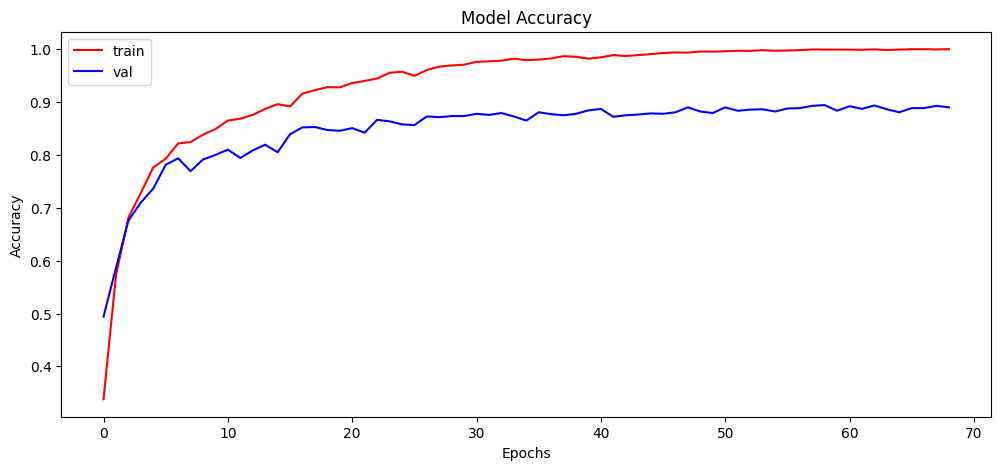

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [26]:
model.save("plant_disease.h5")

In [27]:
json_model = model.to_json()
with open('/kaggle/working/plant_disease.h5', 'w') as json_file:
    json_file.write(json_model)
model.save_weights('plant_model_weights.h5')